In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import string
import re
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("dataset_youtube.csv")
dataset

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes,Category Comment
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280,neutral
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13,neutral
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzryH8U6Dz_yBmIgEZ4AaABAg,LR ICED WOLF,3.2 Million comments if you find mine your a l...,2020-03-15T21:11:08Z,370547,positive
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugw61yKNdyVJ5T4R_sN4AaABAg,MemeDille,The ones who are NOT from Tik-Tok can like thi...,2020-09-08T08:44:47Z,94,negative
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxcqxyEw2jU7KvhofV4AaABAg,cruisendude,The first viewer must feel like the king of th...,2020-08-21T23:15:01Z,36446,positive
...,...,...,...,...,...,...,...,...
1494,Chris Brown - Loyal (Official Video) ft. Lil W...,ChrisBrownVEVO,Ugx0v_kwt_OjHumTf314AaABAg,TheNastyMan 420,Good job chris on the 1 bil. I knew this song ...,2020-09-06T02:21:45Z,7,positive
1495,Chris Brown - Loyal (Official Video) ft. Lil W...,ChrisBrownVEVO,UgzmGOdpkEGRQmGDoyd4AaABAg,Yuvraj Sahota,Lets see whos here from september to december ...,2020-09-03T22:12:07Z,2,positive
1496,Chris Brown - Loyal (Official Video) ft. Lil W...,ChrisBrownVEVO,UgyZwUKM_fkKAA2S9IZ4AaABAg,Rod Reactz,1 billion views this song is so underrated,2020-09-08T15:14:08Z,1,neutral
1497,Chris Brown - Loyal (Official Video) ft. Lil W...,ChrisBrownVEVO,UgyOHVIZqvR3WfqErRJ4AaABAg,Zawad Hossain,"As soon as this hits 1 Billi, everyone go to C...",2020-08-25T17:31:20Z,208,positive


# PREPROCCESING

In [3]:
dataset = pd.DataFrame(dataset[['Comment','Category Comment']])
dataset

,Comment,Category Comment
0,The people who liked this comment is officiall...,neutral
1,Let's be honest this wasn't your recommendatio...,neutral
2,3.2 Million comments if you find mine your a l...,positive
3,The ones who are NOT from Tik-Tok can like thi...,negative
4,The first viewer must feel like the king of th...,positive
...,...,...
1494,Good job chris on the 1 bil. I knew this song ...,positive
1495,Lets see whos here from september to december ...,positive
1496,1 billion views this song is so underrated,neutral
1497,"As soon as this hits 1 Billi, everyone go to C...",positive


In [4]:
dataset['Comment'] = dataset['Comment'].str.replace('(@\w+.*?)',"")
dataset['Comment'] = dataset['Comment'].str.replace('(#\w+.*?)',"")
dataset['Comment'] = dataset['Comment'].str.replace('(&\w+.*?)',"")
dataset['Comment'] = dataset['Comment'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
dataset['Comment'] = dataset['Comment'].str.replace(r"[\"\'\|\?\=\.\@\#\*\,]", '')
dataset['Comment'] = dataset['Comment'].str.replace(r"[0-9]", '')
dataset['Comment'] = dataset['Comment'].str.replace(r'  ', ' ')
dataset['Comment'] = dataset['Comment'].str.replace(r'   ', ' ')
dataset['Comment'] = dataset['Comment'].str.replace(r"[\,\+\_\-\:\!\%\;\/\\]", ' ')

C:\Users\USER\AppData\Local\Temp\ipykernel_7808\1461539364.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Comment'] = dataset['Comment'].str.replace('(@\w+.*?)',"")
C:\Users\USER\AppData\Local\Temp\ipykernel_7808\1461539364.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Comment'] = dataset['Comment'].str.replace('(#\w+.*?)',"")
C:\Users\USER\AppData\Local\Temp\ipykernel_7808\1461539364.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Comment'] = dataset['Comment'].str.replace('(&\w+.*?)',"")
C:\Users\USER\AppData\Local\Temp\ipykernel_7808\1461539364.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Comment'] = dataset['Comment'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
C:\Users\USER

In [5]:
def remove_singl_char(teks):
    return re.sub(r"\b[a-zA-Z]\b", "", teks)

dataset['Comment'] = dataset['Comment'].apply(remove_singl_char)

In [6]:
def remove_whitespace_LT(teks):
    return teks.strip()

dataset['Comment'] = dataset['Comment'].apply(remove_whitespace_LT)

In [7]:
def remove_whitespace_multiple(teks):
    return re.sub('\s+',' ',teks)

dataset['Comment'] = dataset['Comment'].apply(remove_whitespace_multiple)

In [8]:
def remove_punctuation(teks):
    return teks.translate(str.maketrans("","",string.punctuation))

dataset['Comment'] = dataset['Comment'].apply(remove_punctuation)

In [9]:
dataset['Comment'] = dataset['Comment'].str.lower()
dataset

,Comment,Category Comment
0,the people who liked this comment is officiall...,neutral
1,lets be honest this wasnt your recommendation ...,neutral
2,million comments if you find mine your legend,positive
3,the ones who are not from tik tok can like thi...,negative
4,the first viewer must feel like the king of th...,positive
...,...,...
1494,good job chris on the bil knew this song would...,positive
1495,lets see whos here from september to december,positive
1496,billion views this song is so underrated,neutral
1497,as soon as this hits billi everyone go to chri...,positive


In [10]:
dataset_titik_ilang=[]
for i in dataset.index:
  #re.sub("[A-Za-z0-9]+\.{3}", "", df['text'][i])
  dataset_titik_ilang.append(re.sub("[A-Za-z0-9]+\*", "", dataset['Comment'][i]))

dataset['Comment'] = pd.DataFrame(dataset_titik_ilang)

In [11]:
dataset

,Comment,Category Comment
0,the people who liked this comment is officiall...,neutral
1,lets be honest this wasnt your recommendation ...,neutral
2,million comments if you find mine your legend,positive
3,the ones who are not from tik tok can like thi...,negative
4,the first viewer must feel like the king of th...,positive
...,...,...
1494,good job chris on the bil knew this song would...,positive
1495,lets see whos here from september to december,positive
1496,billion views this song is so underrated,neutral
1497,as soon as this hits billi everyone go to chri...,positive


In [12]:
dataset.isna().sum()

Comment             0
Category Comment    0
dtype: int64

In [13]:
dataset.Comment.duplicated().sum()

216

In [14]:
dataset.loc[dataset.Comment.duplicated(), :]

,Comment,Category Comment
10,the people who liked this comment is officiall...,neutral
13,the people who liked this comment is officiall...,neutral
14,the people who liked this comment is officiall...,neutral
15,the people who liked this comment is officiall...,neutral
27,the people who liked this comment is officiall...,neutral
...,...,...
1451,im surprised nintendo hasnt striked drake for ...,neutral
1452,listening to this to remember the old days whe...,positive
1453,drake is the type of person to install air con...,neutral
1477,its crazy how we are listening to these songs ...,positive


In [15]:
dataset_bersih = dataset.drop_duplicates(subset=["Comment"])
dataset_bersih.reset_index(drop=True, inplace = True)

In [16]:
dataset_bersih.Comment.duplicated().sum()

0

In [17]:
dataset_bersih.shape

(1283, 2)

In [18]:
dataset_bersih.to_csv('dataset_youtube_bersih.csv')

In [19]:
df_bersih = pd.read_csv('dataset_youtube_bersih.csv')
df_bersih

,Unnamed: 0,Comment,Category Comment
0,0,the people who liked this comment is officiall...,neutral
1,1,lets be honest this wasnt your recommendation ...,neutral
2,2,million comments if you find mine your legend,positive
3,3,the ones who are not from tik tok can like thi...,negative
4,4,the first viewer must feel like the king of th...,positive
...,...,...,...
1278,1278,good job chris on the bil knew this song would...,positive
1279,1279,lets see whos here from september to december,positive
1280,1280,billion views this song is so underrated,neutral
1281,1281,as soon as this hits billi everyone go to chri...,positive


In [20]:
del df_bersih['Unnamed: 0']

In [21]:
#label encoding, menjadikan nilai negatif = 0 & positif = 1
df_bersih['Target_type'] = df_bersih['Category Comment'].map({'negative': 2,'neutral': 0,'positive':1})
df_bersih

,Comment,Category Comment,Target_type
0,the people who liked this comment is officiall...,neutral,0
1,lets be honest this wasnt your recommendation ...,neutral,0
2,million comments if you find mine your legend,positive,1
3,the ones who are not from tik tok can like thi...,negative,2
4,the first viewer must feel like the king of th...,positive,1
...,...,...,...
1278,good job chris on the bil knew this song would...,positive,1
1279,lets see whos here from september to december,positive,1
1280,billion views this song is so underrated,neutral,0
1281,as soon as this hits billi everyone go to chri...,positive,1


In [24]:
x = df_bersih['Category Comment']
y = df_bersih['Target_type']

Text(0, 0.5, 'target type')

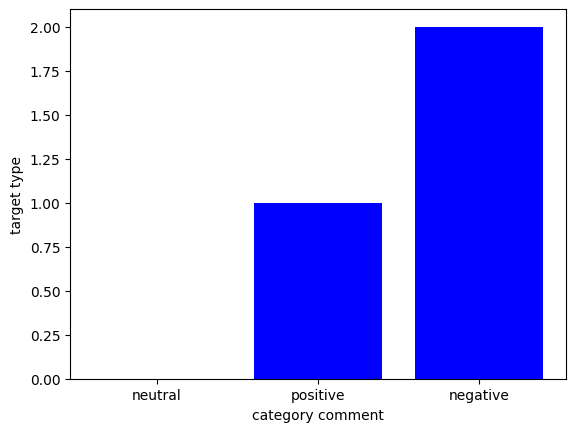

In [25]:
plt.bar(x, y, color='blue')
plt.title("")
plt.xlabel("category comment")
plt.ylabel("target type")

In [26]:
df_bersih['Category Comment'].value_counts()

positive    813
neutral     360
negative    110
Name: Category Comment, dtype: int64

In [27]:
#Melakukan Oversampling
df_negatif = df_bersih.loc[df_bersih['Category Comment'] == 'negative']
df_negatif_gabungan = pd.concat([df_negatif,df_negatif,df_negatif,df_negatif])
df_negatif_gabungan.reset_index(drop = True, inplace = True)
df_negatif_gabungan

,Comment,Category Comment,Target_type
0,the ones who are not from tik tok can like thi...,negative,2
1,these dislikes were people from who didnt sing...,negative,2
2,can you stop liking now the notifications gett...,negative,2
3,only people who didnt came from tik tok are wo...,negative,2
4,it has mor dislikes than de average likes of b...,negative,2
...,...,...,...
435,never really liked this song but the meme like...,negative,2
436,no nudes no drugs no alcohol just some meme ma...,negative,2
437,this sounds so weird without the wii shop musi...,negative,2
438,if you mess with me like rohan once did youre ...,negative,2


In [28]:
#menggabungkan data minor oversampling ke dalam dataset
data_final = pd.concat([df_bersih,df_negatif_gabungan])
data_final.reset_index(drop=True, inplace = True)
data_final

,Comment,Category Comment,Target_type
0,the people who liked this comment is officiall...,neutral,0
1,lets be honest this wasnt your recommendation ...,neutral,0
2,million comments if you find mine your legend,positive,1
3,the ones who are not from tik tok can like thi...,negative,2
4,the first viewer must feel like the king of th...,positive,1
...,...,...,...
1718,never really liked this song but the meme like...,negative,2
1719,no nudes no drugs no alcohol just some meme ma...,negative,2
1720,this sounds so weird without the wii shop musi...,negative,2
1721,if you mess with me like rohan once did youre ...,negative,2


### TOKENISASI

In [29]:
def token(teks):
  nstr = teks.split(" ")
  dt = []
  a = -1
  for i in nstr:
    a = a + 1
  if i == '':
    dt.append(a)
  p = 0
  b = 0
  for q in dt:
    b = q - p
    del nstr[b]
    p = p + 1
  return nstr

In [30]:
data_final['Comment'] = data_final['Comment'].apply(token)

In [31]:
data_final

,Comment,Category Comment,Target_type
0,"[the, people, who, liked, this, comment, is, o...",neutral,0
1,"[lets, be, honest, this, wasnt, your, recommen...",neutral,0
2,"[million, comments, if, you, find, mine, your,...",positive,1
3,"[the, ones, who, are, not, from, tik, tok, can...",negative,2
4,"[the, first, viewer, must, feel, like, the, ki...",positive,1
...,...,...,...
1718,"[never, really, liked, this, song, but, the, m...",negative,2
1719,"[no, nudes, no, drugs, no, alcohol, just, some...",negative,2
1720,"[this, sounds, so, weird, without, the, wii, s...",negative,2
1721,"[if, you, mess, with, me, like, rohan, once, d...",negative,2


## hapus stopwords

In [34]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('english')
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data_final['Comment'] = data_final['Comment'].apply(stopwords_removal) 


data_final['Comment'].head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0          [people, liked, comment, officially, views]
1      [lets, honest, wasnt, recommendation, searched]
2              [million, comments, find, mine, legend]
3                      [ones, tik, tok, like, comment]
4       [first, viewer, must, feel, like, king, world]
5             [imagine, many, peoples, come, everyday]
6                       [comments, find, mine, legend]
7                                 [came, check, views]
8    [imagine, many, armys, coming, every, secondsm...
9                                         [hey, mikee]
Name: Comment, dtype: object

### STEMMING

In [35]:
!pip install Sastrawi
!pip install swifter
#import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

ModuleNotFoundError: No module named 'Sastrawi'